# Lab 4

For this lab we will start by reviewing some core concepts around dates, ranking, and loops. Then we will explore speed dating data and end with exercises that let you explore cocoa rating data.

## Table of Contents
* [Review](#Review)
* [Explore](#Explore)
* [Exercises](#Exercises)

In [2]:
library(tidyverse)
library(nycflights13)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


## Review

## How to date R

Dates in R, like any other programming language, can be fairly complicated and need to be handled a special way. When you give R something like "10/02/2002", you may think it's obvious that this a date. But R just views this as a regular string type, in other words a piece of text like "taco cat". You have to explicitly tell R how to handle these strings so that they are stored properly. For instance is the format of this date MM/DD/YYYY or DD/MM/YYYY? But once you tell R this is a date and it has this format, then doing fairly complex operations on it become much easier (e.g. what day of the week is 03/12/2045? What is the date for 02/10/2060 + 60 days?).

There are multiple functions and packages in R for handling dates, here are a couple of the common ways.

### Base R (No packages required)

In [14]:
#Here we create a date type variable, I used two different formats for the same value
dt = as.Date("10/02/2002", format="%m/%d/%Y")
dt2 = as.Date("October 2, 2002", format = "%B %d, %Y")

In [13]:
#How did I know what format to use? I looked at the documentation
?strptime

In [9]:
#If we look at the class here, we see dt is in fact a date
class(dt)

[1] "Date"

In [15]:
#Now we can do nifty things like add days to our date
dt + 10
dt2 + 10

[1] "2002-10-12"

[1] "2002-10-12"

In [18]:
#What if I want the difference between two dates in weeks?
dt2 = as.Date("12/22/2002", format="%m/%d/%Y")
difftime(dt, dt2, units = "weeks")

Time difference of -11.57143 weeks

In [20]:
#You can also use dates in regular R functions now, let's say I want 6 weeks in a vector from the original date I set
seq(dt, length = 6, by = 7)

[1] "2002-10-02" "2002-10-09" "2002-10-16" "2002-10-23" "2002-10-30"
[6] "2002-11-06"

In [25]:
#You can also still use boolean comparisons
# dt2 = "12/22/2002"
# dt = "10/02/2002"
dt2 > dt

[1] TRUE

In [38]:
#Finally, we can also have datetimes, which are dates with the time also included
#In R, there are two main types for this type:  POSIXct and POSIXlt

#Taking a look at the flight data notice that time_hour is in a datetime format
str(flights)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	336776 obs. of  19 variables:
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num  11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr  "UA" "UA" "AA" "B6" ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr  "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr  "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr  "IAH" "IAH" "MIA" "BQN" ...
 $ air_time      : num  227 227 160 183 116 150 158 53 140 138 ...
 $ distanc

In [39]:
#Or just run class() to verify this
class(flights$time_hour)

[1] "POSIXct" "POSIXt"

In [40]:
#If I wanted to create a date field from this, here's all I would need to do
flights_new = flights %>% mutate(date = as.Date(time_hour))
str(flights_new)

### Using a Package (Lubridate)

Lubridate is package that uses the underlying datetime R formats (POSIXct and POSIXlt) to make more user friendly functions that make manipulations with dates a lot easier.

In [43]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [46]:
#First let's create a simple date with lubridate, notice that it always converts dates to datetimes
dt = ISOdate("2017", "02", "08")
dt2 = ymd_hms("2017-02-08 05:00:00")
dt

[1] "2017-02-08 12:00:00 GMT"

In [45]:
#Note that under the hood this variable is just a regular R datetime
class(dt)

[1] "POSIXct" "POSIXt"

In [50]:
#Now we have a whole arsenal of functions to play with these datetimes
# dt = "2017-02-08 12:00:00 GMT"
year(dt)
week(dt)
wday(dt)
hour(dt)
tz(dt)

[1] 2017

[1] 6

[1] 4

[1] 12

[1] "GMT"

In [57]:
#And there are multiple arguments for each function to get the output you want
wday(dt, label = TRUE)

[1] Wed
Levels: Sun < Mon < Tues < Wed < Thurs < Fri < Sat

In [61]:
#We can also add durations to each date
# dt = "2017-02-08 12:00:00 GMT"
dtnew = dt + ddays(5) + dminutes(20) + dhours(10) + dyears(1)
dtnew

[1] "2018-02-13 22:20:00 GMT"

## Ranking Rguments

Ranking fields in a data frame is a super common thing that comes up in many problems you'll tackle. Here I'll review some of the basics of doing this in R using the flights dataset.

In [63]:
#Let's first say we want to find the top 10 tail numbers based on the distance traveled
head(flights,1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00


In [72]:
#Here we make a data fram that takes the top 10 values based on distance
flights_ranked = flights %>% arrange(desc(distance)) %>% top_n(10,distance)

In [74]:
#Huh? Why are there 342 rows?
nrow(flights_ranked)

[1] 342

In [79]:
#Let's go about it a different way
flights_ranked2 = flights %>% arrange(desc(distance)) %>% mutate(rnk = row_number()) %>% filter(rnk <= 10)

In [80]:
flights_ranked2

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,rnk
2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00,1
2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00,2
2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00,3
2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00,4
2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00,5
2013,1,6,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00,6
2013,1,7,1042,900,102,1620,1530,50,HA,51,N385HA,JFK,HNL,612,4983,9,0,2013-01-07 09:00:00,7
2013,1,8,901,900,1,1504,1530,-26,HA,51,N389HA,JFK,HNL,645,4983,9,0,2013-01-08 09:00:00,8
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00,9
2013,1,10,859,900,-1,1449,1530,-41,HA,51,N388HA,JFK,HNL,633,4983,9,0,2013-01-10 09:00:00,10


In [82]:
#Now what if I just want the unique tailnumbers?

#Solution:
top_tails = unique(flights_ranked2 %>% .$tailnum)

[1] "N380HA" "N384HA" "N381HA" "N385HA" "N389HA" "N388HA"

##  > LoopeR <

Some of you have been using loops to solve the HW problems, so I wanted to make sure the syntax and use of these is clear to everyone. In general, loops are SLOW, so you will only want to use them if you really need to. R provides a lot of optimized functions that don't require loops, so always try to use these first.

What are loops?
Basically, they just a way that you iterate through a vector and perform the same operation to each element. The two main types of loops you will encounter are `for` loops and `while` loops.

In [83]:
#Lets create two simple vectors
vct1 = c(2,4,5,6)
vct2 = c(1,2,3,4)

In [88]:
#Now we can cycle through each element of vct1
#for loops only execute for the length of the element to the right (e.g. vct1)
for(i in vct1) {
    print(i)
}

[1] 2
[1] 4
[1] 5
[1] 6


In [89]:
# We can define variables that use elements in these loops
x = 0
for(i in vct1) {
    x = x+i
}
#see what's in x
x

In [96]:
# More commonly we can also use multiple vectors to do things
#Let's say I want to compare each element of vct1 to vct2 and store this in a new vector
compare_vect = c()
for(i in seq(length(vct1))) {
    compare_vect[i] = vct1[i] >= vct2[i]
}

#Let's see what's in this vector
compare_vect

[1] TRUE TRUE TRUE TRUE

In [97]:
#While loops can be used if you want to continue to execute until some condition is met

#~~~~~~~~~~~~~~~ BE CAREFUL THOUGH! IF YOUR CONDITION IS NEVER MET THE LOOP WILL NOT STOP~~~~~~~~~~~~~~~#
cnt = 0
while(cnt < 10) {
    print("hi!")
    cnt = cnt + 1
}

[1] "hi!"
[1] "hi!"
[1] "hi!"
[1] "hi!"
[1] "hi!"
[1] "hi!"
[1] "hi!"
[1] "hi!"
[1] "hi!"
[1] "hi!"


## Explore

The following analysis is based on data and work that can be found on Kaggle. This data was collected by Columbia to investigate gender differences in mate selection (their words not mine :) ). They essentially ran speed dating sessions from 2002 to 2004, each participant was allowed 4 minutes with someone from the opposite sex, then after they were asked if they would like to see their date again and judged them based on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. For this exploration we'll try to spot differences with how men and women choose who they want to date!

**Note:** *This content uses some functions and techniques that are outside the scope of the course, it is meant to show you how what you're learning can be used in interesting problems.*

In [65]:
#Library needed for radar charts
library(fmsb)

In [ ]:
#Load in the data
rawdat = read.csv('Speed Dating Data.csv', header = T, stringsAsFactors = F)

In [70]:
head(rawdat)

iid,id,gender,idg,condtn,wave,round,position,positin1,order,⋯,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1,1,0,1,1,1,10,7,NA,4,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,3,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,10,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,5,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,7,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,6,⋯,5,7,7,7,7,NA,NA,NA,NA,NA


### What are speed daters looking for in their matches?

In [68]:
#Tons of cleanup code to get it ready for plotting
dat = rawdat %>% select(-id, -idg, -condtn, -round, -position, -positin1, -order, -partner, -tuition, -undergra, -mn_sat)
at00 = dat %>%select(iid, pid, dec, gender, attr, sinc, intel, fun, amb, shar, like, prob) %>% filter(!pid == "NA")
at00[is.na(at00)] = 1000
at00$total = rowSums(at00[,c("attr", "sinc", "intel", "fun", "amb", "shar")])
at00 = at00 %>% filter(!total == "6000")
at00[at00 == "1000"] = NA
at00$total = rowSums(at00[,c("attr", "sinc", "intel", "fun", "amb", "shar")], na.rm=TRUE)
at00 = at00 %>% filter(!total == "0")
at00 = at00 %>% mutate(pgender = ifelse(gender == 0, 1, 0))
at11 =dat %>%group_by(gender) %>%select(iid, gender, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1) %>% unique()
at11[is.na(at11)] = 0
at11$total = rowSums(at11[,c("attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1")])
at11 = at11 %>% filter(!total == "0")
at11$attr1_1 = round(at11$attr1_1/at11$total*100, digits = 2)
at11$sinc1_1 = round(at11$sinc1_1/at11$total*100, digits = 2)
at11$intel1_1 = round(at11$intel1_1/at11$total*100, digits = 2)
at11$fun1_1 = round(at11$fun1_1/at11$total*100, digits = 2)
at11$amb1_1 = round(at11$amb1_1/at11$total*100, digits = 2)
at11$shar1_1 = round(at11$shar1_1/at11$total*100, digits = 2)
at11$total = rowSums(at11[,c("attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1")])
at11$total = round(at11$total, digits = 0)
test1 = at11 %>%group_by(gender) %>% summarise(Attractive = mean(attr1_1), Sincere = mean(sinc1_1), Intelligent = mean(intel1_1), Fun = mean(fun1_1), Ambitious = mean(amb1_1), Interest = mean(shar1_1))
test1forplot = test1 %>% select(-gender)
maxmin = data.frame(Attractive = c(36, 0),Sincere = c(36, 0),Intelligent = c(36, 0),Fun = c(36, 0),Ambitious = c(36, 0),Interest = c(36, 0))
test11 = rbind(maxmin, test1forplot)
test11male = test11[c(1,2,4),]
test11female = test11[c(1,2,3),]

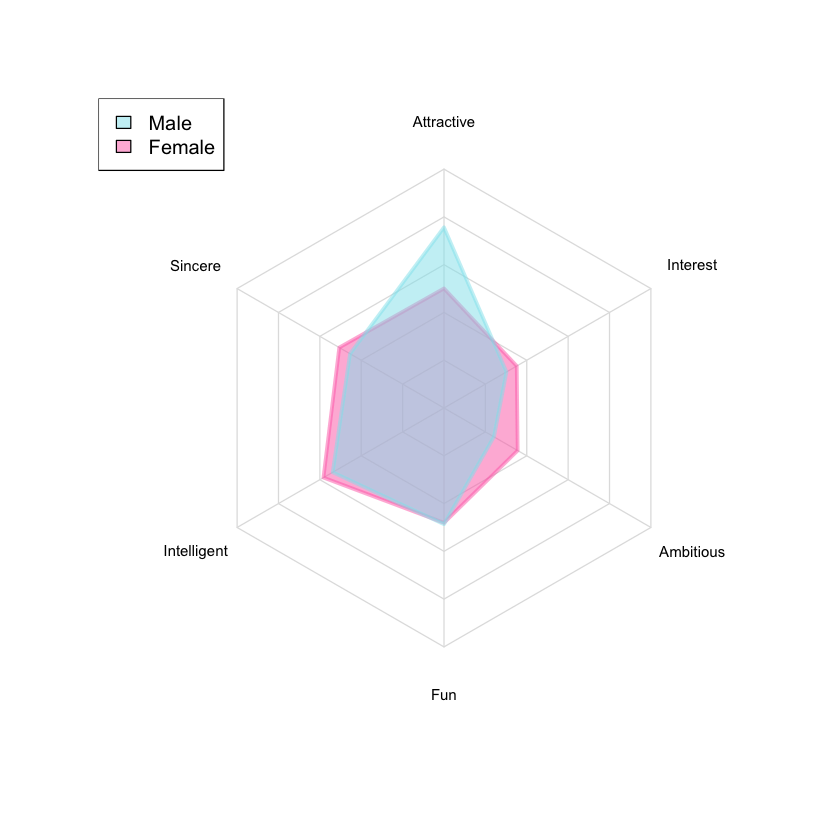

In [69]:
#Finally the fun part
radarchart(test11,pty = 32,axistype = 0,
           pcol = c(adjustcolor("hotpink1", 0.5), adjustcolor("cadetblue2", 0.5)),
           pfcol = c(adjustcolor("hotpink1", 0.5), adjustcolor("cadetblue2", 0.5)),
           plty = 1,
           plwd = 3,
           cglty = 1,
           cglcol = "gray88",
           centerzero = TRUE,
           seg = 5,
           vlcex = 0.75,
           palcex = 0.75)

legend("topleft", 
       c("Male", "Female"),
       fill = c(adjustcolor("cadetblue2", 0.5), adjustcolor("hotpink1", 0.5)))

### What do speed daters think their same-sex peers are looking for?

In [71]:
#Again get the data ready as above
at41= dat %>%group_by(gender) %>%select(iid, gender, attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1) %>% unique()
at41[is.na(at41)] = 0
at41$total = rowSums(at41[,c("attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1")])
at41= at41 %>% filter(!total == "0")
at41$attr4_1 = round(at41$attr4_1/at41$total*100, digits = 2)
at41$sinc4_1 = round(at41$sinc4_1/at41$total*100, digits = 2)
at41$intel4_1 = round(at41$intel4_1/at41$total*100, digits = 2)
at41$fun4_1 = round(at41$fun4_1/at41$total*100, digits = 2)
at41$amb4_1 = round(at41$amb4_1/at41$total*100, digits = 2)
at41$shar4_1 = round(at41$shar4_1/at41$total*100, digits = 2)
at41$total = rowSums(at41[,c("attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1")])
at41$total = round(at41$total, digits = 0)
test4 = at41 %>%group_by(gender) %>% summarise(Attractive = mean(attr4_1), Sincere = mean(sinc4_1), Intelligent = mean(intel4_1), Fun = mean(fun4_1), Ambitious = mean(amb4_1), Interest = mean(shar4_1))
test4forplot =test4 %>% select(-gender)
test41 = rbind(maxmin, test4forplot)

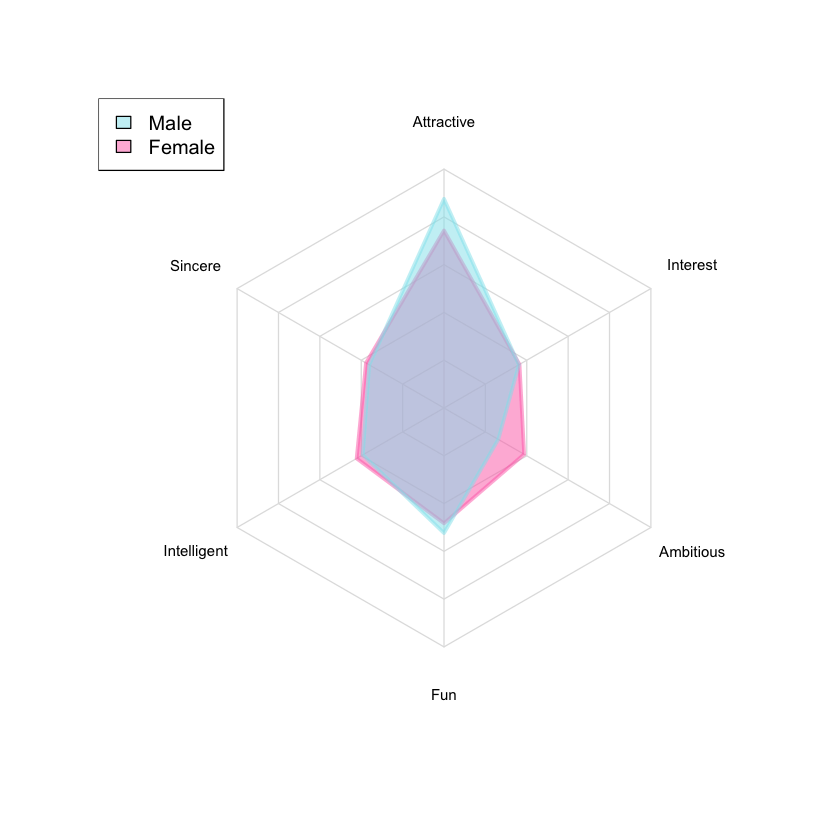

In [72]:
radarchart(test41,
           pty = 32,
           axistype = 0,
           pcol = c(adjustcolor("hotpink1", 0.5), adjustcolor("cadetblue2", 0.5)),
           pfcol = c(adjustcolor("hotpink1", 0.5), adjustcolor("cadetblue2", 0.5)),
           plty = 1,
           plwd = 3,
           cglty = 1,
           cglcol = "gray88",
           centerzero = TRUE,
           seg = 5,
           vlcex = 0.75,
           palcex = 0.75)

legend("topleft", 
       c("Male", "Female"),
       fill = c(adjustcolor("cadetblue2", 0.5), adjustcolor("hotpink1", 0.5)))

---

## Exercises

### Explore!

For this exercise, it will be more open ended and let you explore and find interesting things in a new data set. I added a few questions you can try to answer below, but feel free to explore more!

The data set has flavor profiles of cocoa beans from around the world.

In [3]:
#Load in the data
cocoa = read_csv("flavors_of_cacao.csv")
#Rename the fields to get rid of spaces
names(cocoa) = make.names(names(cocoa))
#Take a peek
head(cocoa)

Parsed with column specification:
cols(
  Company = col_character(),
  `Specific Bean Origin` = col_character(),
  REF = col_integer(),
  `Review Date` = col_integer(),
  `Cocoa Percent` = col_character(),
  `Company Location` = col_character(),
  Rating = col_double(),
  `Bean Type` = col_character(),
  `Broad Bean Origin` = col_character()
)


Company,Specific.Bean.Origin,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


### How many NA values are there? Remove them after you find them.

In [129]:
#Solution:
#One approach to see each column with missing values (table(sum(is.na(cocoa))) gives total NAs)
for (i in names(cocoa)) {
    cat(i,":",sum(is.na(cocoa[i])),'\n')
}

Company : 0 
Specific.Bean.Origin : 0 
REF : 0 
Review.Date : 0 
Cocoa.Percent : 0 
Company.Location : 0 
Rating : 0 
Bean.Type : 1 
Broad.Bean.Origin : 1 


In [4]:
#Solution:
#Get rid of the NA's and move on
cocoa = na.omit(cocoa)

### Notice that many Bean Types are missing values, fill these missing values in with "Missing".
#### Hint: nchar() can be used to find the length of a string/character

In [5]:
#Solution:
#Overwrite Bean.Type column with Missing if there isn't anything populated
cocoa = cocoa %>% mutate(Bean.Type = ifelse(nchar(Bean.Type)<2,"Missing",Bean.Type))

### The Cocoa Percent field is formatted as a character, but we want to use it as a number, convert this field by creating a new column called Cocoa.Percent.Int
#### Hint: You will need to use substr() and as.numeric()

In [6]:
library(stringr)

In [7]:
#Solution:
cocoa = cocoa %>% mutate(Cocoa.Percent.Int = as.numeric(substr(Cocoa.Percent,1,2)))
str(cocoa)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1793 obs. of  10 variables:
 $ Company             : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ Specific.Bean.Origin: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ REF                 : int  1876 1676 1676 1680 1704 1315 1315 1315 1319 1319 ...
 $ Review.Date         : int  2016 2015 2015 2015 2015 2014 2014 2014 2014 2014 ...
 $ Cocoa.Percent       : chr  "63%" "70%" "70%" "70%" ...
 $ Company.Location    : chr  "France" "France" "France" "France" ...
 $ Rating              : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ Bean.Type           : chr  "Missing" "Missing" "Missing" "Missing" ...
 $ Broad.Bean.Origin   : chr  "Sao Tome" "Togo" "Togo" "Togo" ...
 $ Cocoa.Percent.Int   : num  63 70 70 70 70 70 70 70 70 70 ...


### Explore if there is a linear relationship between Rating and the newly created Cocoa Percent field (e.g. scatterplot!)

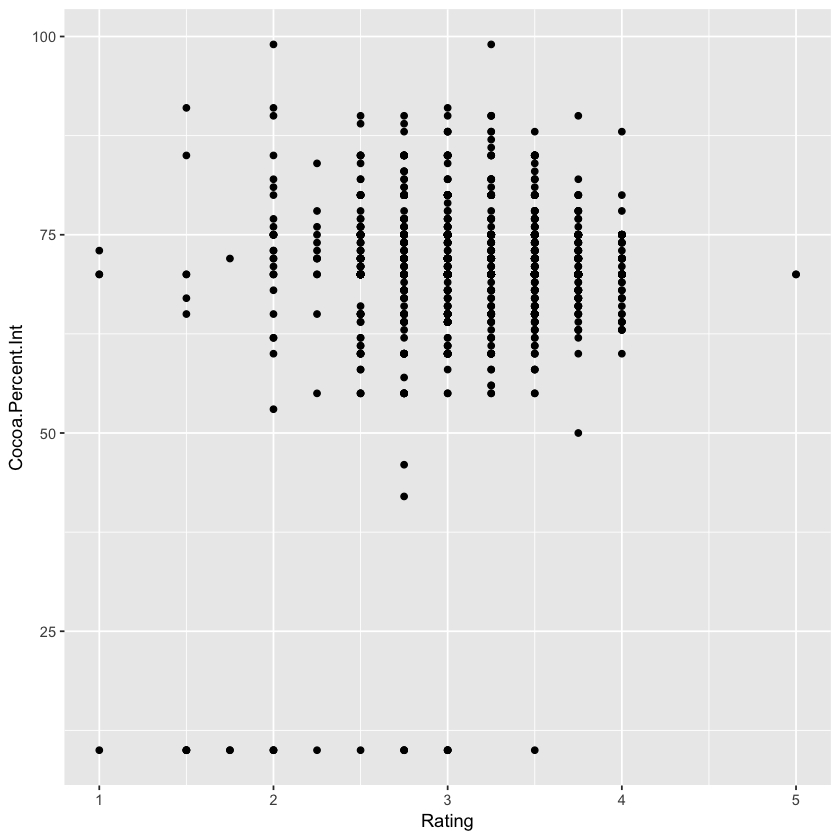

In [172]:
#Solution:
#Based on the plot below there does not appear to a clear linear relationship between the cocoa percent and rating
ggplot(data = cocoa) + geom_point(mapping=aes(x=Rating,y=Cocoa.Percent.Int))

### Which company location has the highest average rating? How many cocoas were included in this rating?

In [12]:
#Solution:
#Here we group by location and find the average rating and total reviews for each location, then sort the results
nwdta = cocoa %>% group_by(Company.Location) %>% 
    summarize(avgrating = mean(Rating), tot=n()) %>% 
    arrange(desc(avgrating))

head(nwdta)

Company.Location,avgrating,tot
Chile,3.750000,2
Amsterdam,3.500000,4
Netherlands,3.500000,4
Philippines,3.500000,1
Iceland,3.416667,3
Vietnam,3.409091,11


### Perhaps the countries with lower ratings, just have more cocoa ratings in general, which brings the average down. Try looking at the top 6 countries that have the most ratings and see the distribution of the ratings for each.

In [29]:
#Solution:
#First lets get the top 5 locations based on the number of reviews
top_country = nwdta %>% top_n(6,tot)
top_country

Company.Location,avgrating,tot
Italy,3.325397,63
Canada,3.318548,124
France,3.251603,156
U.S.A.,3.154980,763
U.K.,3.054688,96
Ecuador,3.009259,54


In [30]:
#Solution:
#Now lets get these countries in a list that we can use to filter the main data set by
country_filt = top_country %>% .$Company.Location
country_filt

[1] "Italy"   "Canada"  "France"  "U.S.A."  "U.K."    "Ecuador"

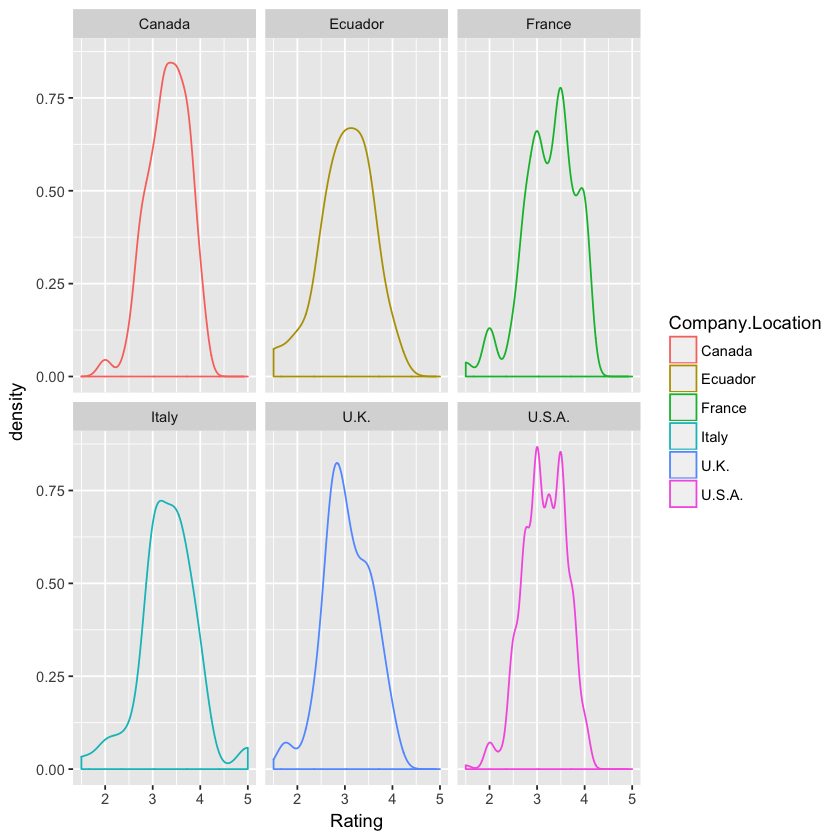

In [31]:
#Solution:
#Now lets filter the dataset down to these locations and make some 
plt = cocoa %>% filter(Company.Location %in% country_filt)
#Plot the rating distribution by country
ggplot(data=plt) + 
    geom_density(mapping=aes(x=Rating,color=Company.Location)) + 
    facet_wrap( ~ Company.Location)

### Investigate if certain Bean Types appear to be higher rated than others. How many ratings are there for each of these types? 

In [37]:
#Solution:
cocoa %>% group_by(Bean.Type) %>% summarise(mn = mean(Rating), tot=n()) %>% arrange(desc(mn))

Bean.Type,mn,tot
Criollo (Ocumare 67),4.000000,1
Criollo (Wild),4.000000,1
Trinitario (85% Criollo),3.875000,2
Amazon mix,3.750000,2
"Blend-Forastero,Criollo",3.750000,1
Criollo (Ocumare 77),3.750000,1
Forastero (Amelonado),3.750000,1
"Trinitario, Nacional",3.750000,1
"Trinitario, TCGA",3.750000,1
"Amazon, ICS",3.625000,2


### Focusing on the bean type with the largest number of ratings, does it appear to be a normal distribution?

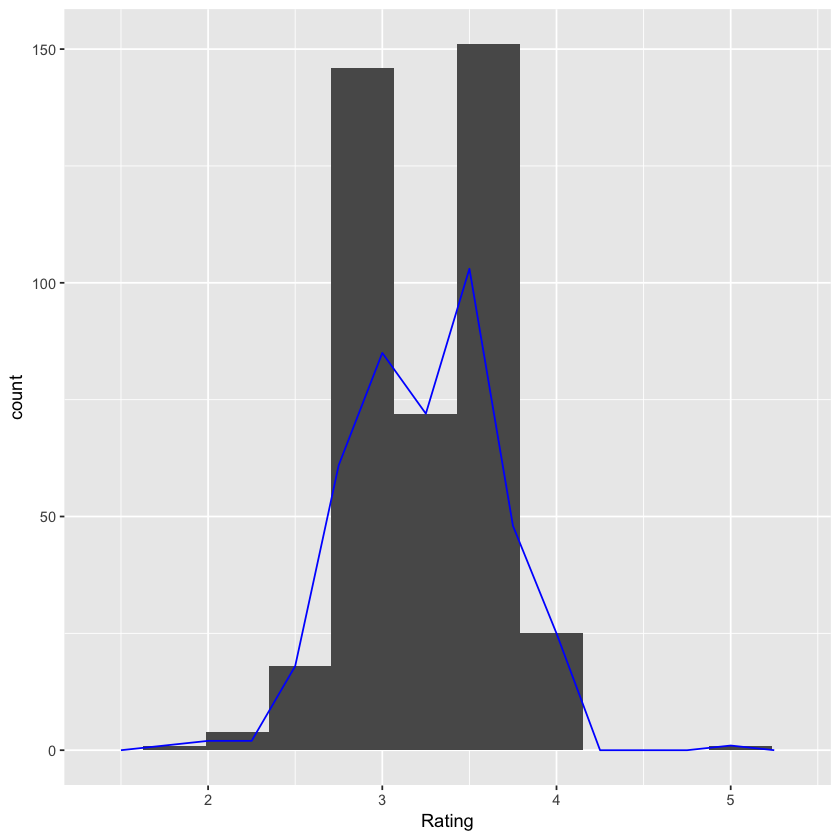

In [60]:
#Solution:
#Trinitario has the largest number of review, so let's filter the data and plot the results
plt2 = cocoa %>% filter(Bean.Type=='Trinitario')
#Looks like fairly normal distribution to me! Slightly bimodal, but normal assumption could work for further modeling
ggplot(data=plt2) + 
    geom_histogram(mapping=aes(x=Rating), bins=10) + 
    geom_freqpoly(mapping=aes(x=Rating),color="blue",binwidth=.25)